In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
class LinearRegression:
    def __init__(self):
        self.theta = None
        self.alpha = None
        
    def _init_parameters(self, X, alpha):
        self.theta = np.random.rand(X.shape[1] + 1, 1)
        self.alpha = alpha
            
    def predict(self, X):
        tmp_x = np.hstack((np.ones_like(X), X))
        return tmp_x.dot(self.theta).flatten()
    
    def get_error(self, hypothesis, y):
        return hypothesis - y.flatten()
    
    def get_cost(self, error, m):
        return (1/(2*m)) * np.square(error)
    
    def fit(self, X, y, alpha=0.5, threshold=1e-6):
        if X.shape[0] != y.shape[0]:
            raise ValueError("X and y are of different size")
        self._init_parameters(X, alpha)
        m = len(X)
        tmp_x = np.hstack((np.ones_like(X), X))
        while True:
            h = self.predict(X)
            error = self.get_error(h, y)
            cost = self.get_cost(error, m)
            gradient = (self.alpha/m) * np.transpose(tmp_x).dot(error).reshape(2, 1)
            new_theta = self.theta - gradient
            if np.sum(abs(new_theta - self.theta)) < threshold:
                break
            self.theta = new_theta

In [3]:
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [4]:
regr = LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train, alpha=0.7)
diabetes_y_pred = regr.predict(diabetes_X_test)

In [5]:
scikit_regr = linear_model.LinearRegression()
scikit_regr.fit(diabetes_X_train, diabetes_y_train)
scikit_diabetes_y_pred = scikit_regr.predict(diabetes_X_test)

In [9]:
print("Coefficients: {}".format(scikit_regr.coef_))
print("Mean squared error: {:.2f}".format(mean_squared_error(diabetes_y_test, scikit_diabetes_y_pred)))
print("Variance score: {:.2f}".format(r2_score(diabetes_y_test, scikit_diabetes_y_pred)))

Coefficients: [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


In [10]:
print("Coefficients: {}".format(regr.theta[1]))
print("Mean squared error: {:.2f}".format(mean_squared_error(diabetes_y_test, diabetes_y_pred)))
print("Variance score: {:.2f}".format(r2_score(diabetes_y_test, diabetes_y_pred)))

Coefficients: [938.23723166]
Mean squared error: 2548.07
Variance score: 0.47


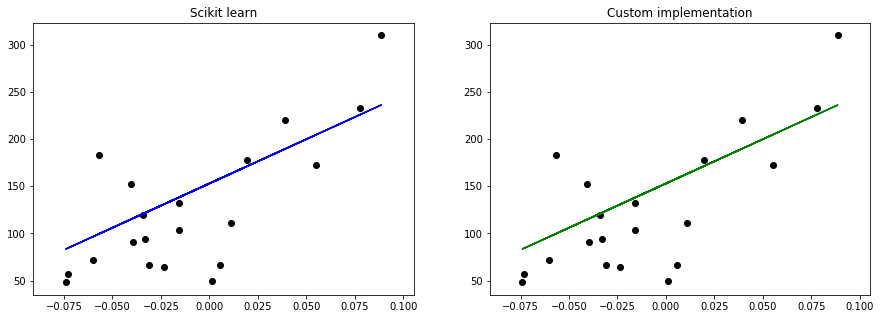

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(diabetes_X_test, diabetes_y_test,  color='black')
ax1.plot(diabetes_X_test, scikit_diabetes_y_pred, color='blue')
ax1.set_title('Scikit learn')

ax2.scatter(diabetes_X_test, diabetes_y_test,  color='black')
ax2.plot(diabetes_X_test, diabetes_y_pred, color='green')
ax2.set_title('Custom implementation')
plt.show()